In [160]:
import pandas as pd
import numpy as np
from constants import *
import matplotlib.pyplot as plt
import seaborn as sns
from constants import *
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA

# Iris dataset PCA features

Text(0.5, 1.0, 'PCA of IRIS dataset')

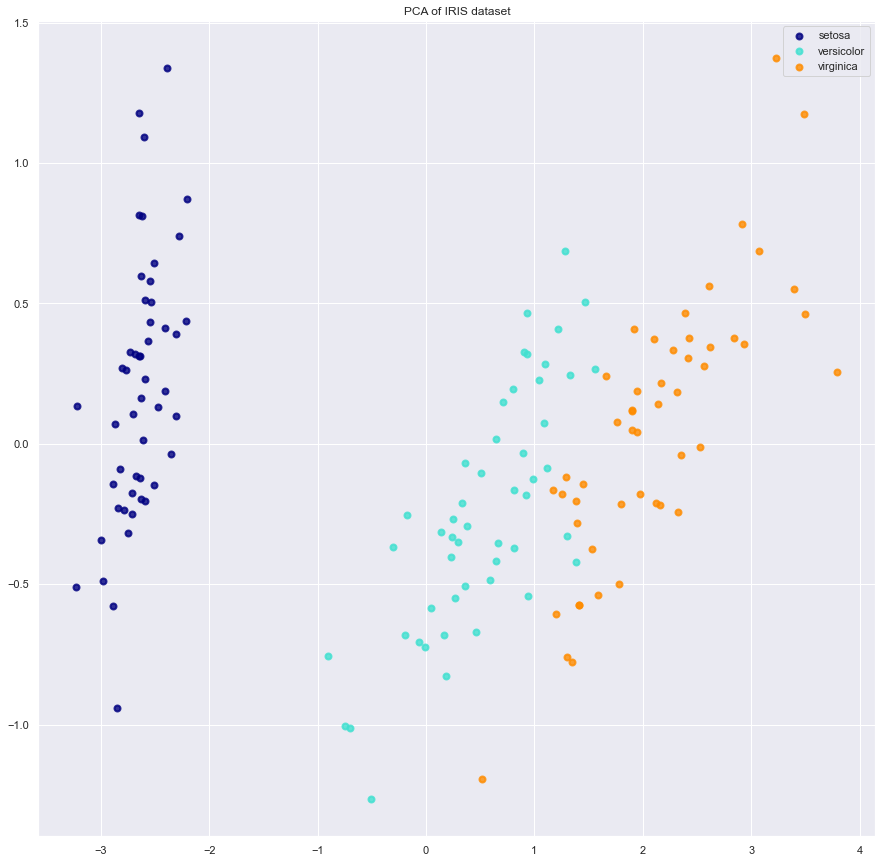

In [161]:
# taken from sklearn docu:
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

## Decision Tree on Iris PCA features

[]

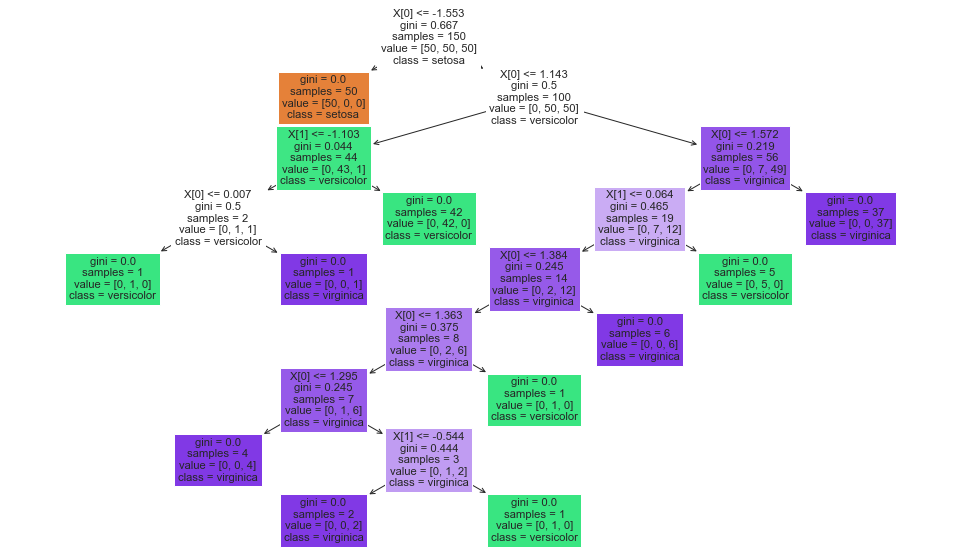

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier().fit(X_r, y)
plt.figure(figsize=(17, 10))

plot = tree.plot_tree(dt, filled=True, class_names=target_names)
plt.plot()


# Performance baseline vs baseline with PCA features


In [163]:
df = pd.read_feather(RESULTS_FILE_PATH).\
    sort_values(by="pca_clean_test_score_change_to_baseline", ascending=True).\
    reset_index(drop=True)

select_columns = ["task_id", "baseline_test_score", "pca_clean_test_score", "pca_clean_test_score_change_to_baseline"]
df[select_columns]


,task_id,baseline_test_score,pca_clean_test_score,pca_clean_test_score_change_to_baseline
0,3560,0.217712,0.180812,-16.949153
1,146821,0.959184,0.926871,-3.368794
2,37,0.740458,0.717557,-3.092784
3,22,0.791176,0.767647,-2.973978
4,125920,0.605882,0.588235,-2.912621
...,...,...,...,...
67,3917,0.846797,0.859331,1.480263
68,167124,0.372206,0.377990,1.554063
69,167121,0.693191,0.709047,2.287506
70,2079,0.645418,0.681275,5.555556


In [164]:
n_improved_datasets = sum(df["pca_clean_test_score_change_to_baseline"] > 0)
n_total_datasets = len(df)


In [165]:
print(f"The accuracy was improved in {n_improved_datasets} of {n_total_datasets} datasets ({n_improved_datasets / n_total_datasets * 100}%)")

The accuracy was improved in 36 of 72 datasets (50.0%)


<AxesSubplot:ylabel='task_id'>

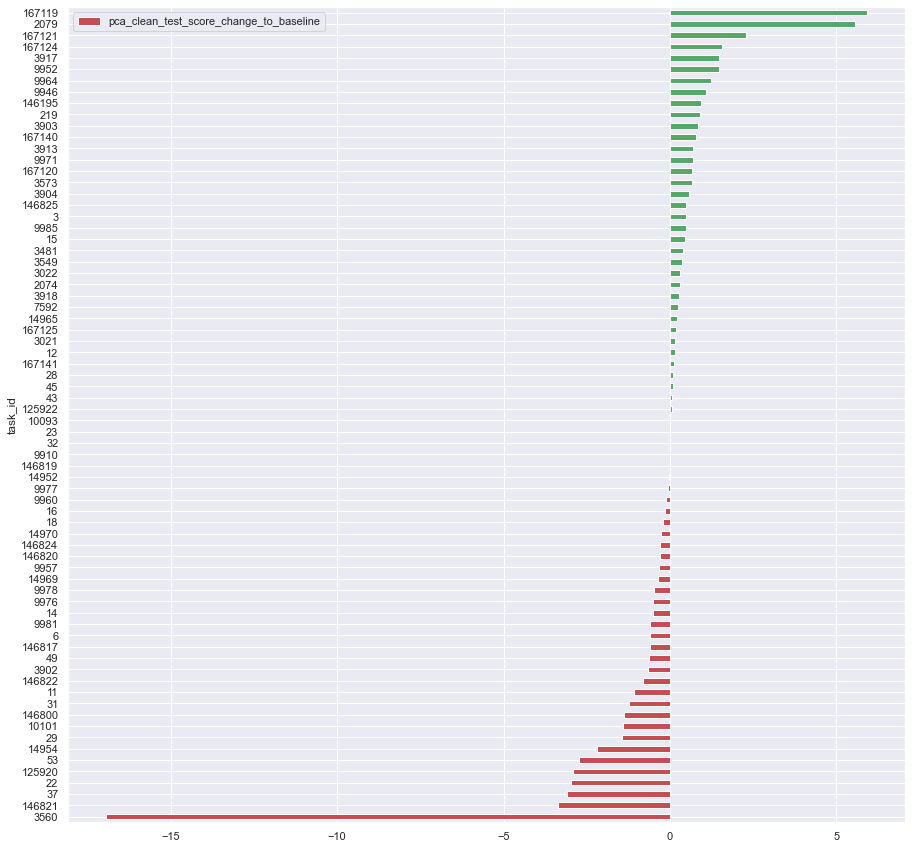

In [166]:
df.plot.\
    barh(
        x="task_id",
        y="pca_clean_test_score_change_to_baseline",
        color=(df["pca_clean_test_score_change_to_baseline"] > 0).map({True: 'g', False: 'r'}),
        figsize=(15, 15)
    )


## set a dataset you want to use

In [167]:
# dataset_id = "40978"  # 2 classes, ~3k features
# dataset_id = "3"  # 2 classes, 73 features
# dataset_id = "1486"  # 2 classes, 174 features
dataset_id = "41027"

n_head = 1000000000

## Plot PCA Features against  target


X shape: (44819, 6)
target classes: 
2    23062
0    17422
1     4335
Name: y, dtype: int64


<Figure size 1080x1080 with 0 Axes>

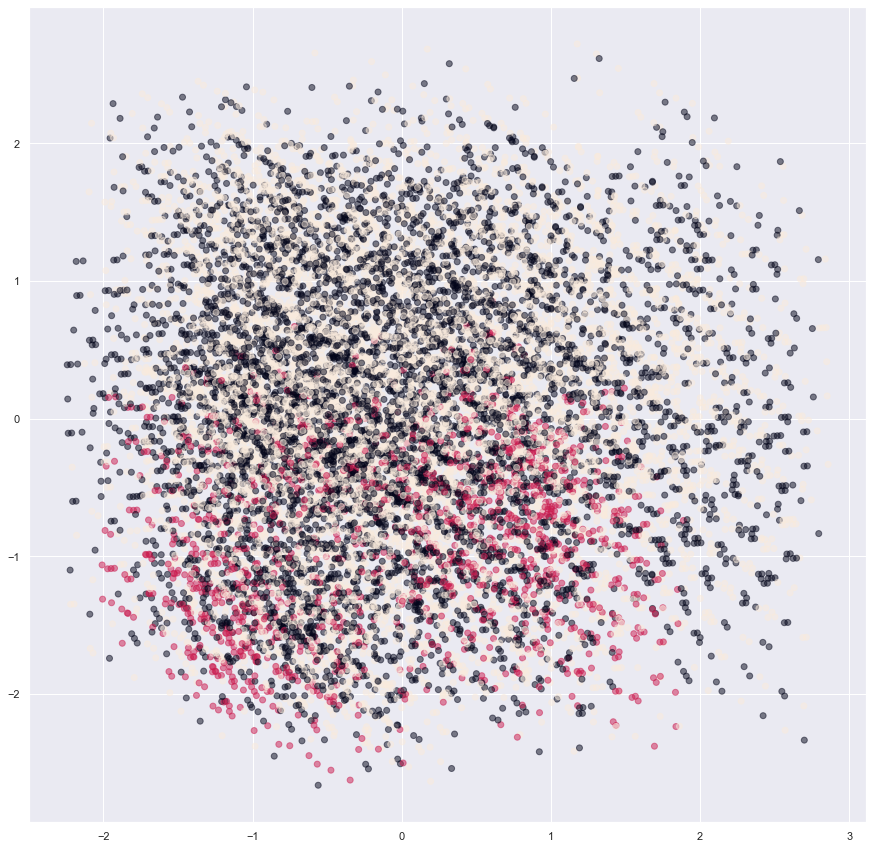

<Figure size 1080x1080 with 0 Axes>

In [168]:
# load data
df_pca_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_TEST_CLEAN_PCA_FILE_NAME))
X = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_CLEAN_FILE_NAME))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

# short feedback of the data and classes
print(f"X shape: {X.shape}")
print(f"target classes: \n{y.value_counts()}")

# split according to the split from training
_, _, _, y_test = train_test_split(X, y, train_size=TRAIN_TEST_SPLIT_TRAIN_SIZE, random_state=RANDOM_STATE)

# reset index
y_test.reset_index(drop=True, inplace=True)

# concat
df_pca_test["y"] = y_test.reset_index(drop=True)

# make a plot
plot_x = df_pca_test["pca_0"].head(n_head)
plot_y = df_pca_test["pca_1"].head(n_head)
plot_c = df_pca_test["y"].head(n_head)

plt.scatter(x=plot_x, y=plot_y, c=plot_c, alpha=0.5)

# set ranges to the axis if needed
# plt.xlim([-2, 2])
# plt.ylim([-5, 5])

plt.figure(figsize = (15,15))


## Plot Kernel PCA Features against target

X shape: (44819, 6)
target classes: 
2    23062
0    17422
1     4335
Name: y, dtype: int64


<Figure size 1080x1080 with 0 Axes>

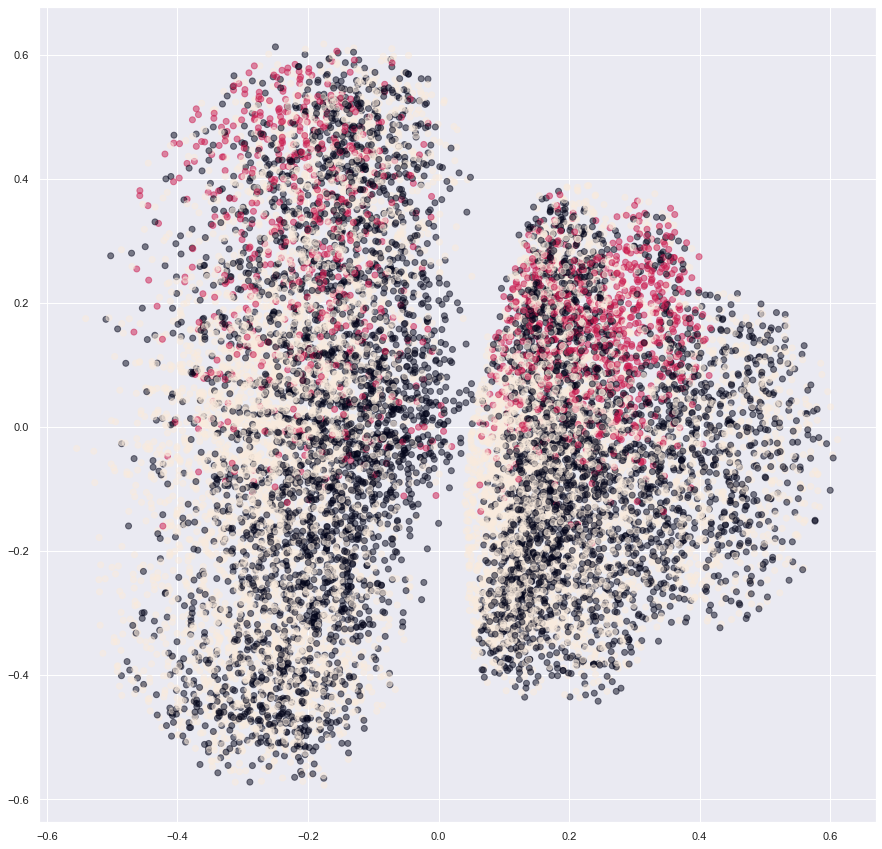

<Figure size 1080x1080 with 0 Axes>

In [169]:
# load data
df_pca_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_TEST_CLEAN_KPCA_FILE_NAME))
X = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_CLEAN_FILE_NAME))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

# short feedback of the data and classes
print(f"X shape: {X.shape}")
print(f"target classes: \n{y.value_counts()}")

# split according to the split from training
_, _, _, y_test = train_test_split(X, y, train_size=TRAIN_TEST_SPLIT_TRAIN_SIZE, random_state=RANDOM_STATE)

# reset index
y_test.reset_index(drop=True, inplace=True)

# concat
df_pca_test["y"] = y_test.reset_index(drop=True)

# make a plot
plot_x = df_pca_test["kpca_0"].head(n_head)
plot_y = df_pca_test["kpca_1"].head(n_head)
plot_c = df_pca_test["y"].head(n_head)

plt.scatter(x=plot_x, y=plot_y, c=plot_c, alpha=0.5)

# set ranges to the axis if needed
# plt.xlim([-1, 1])
# plt.ylim([-1, 1])

plt.figure(figsize = (15,15))
